In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#미리보기
Train = pd.read_csv('/content/train.csv')
Test = pd.read_csv('/content/test.csv')
Test_lbl = pd.read_csv('/content/gender_submission.csv')

In [ ]:
print(Train.shape)
print(Test.shape)
print(Test_lbl.shape)

(891, 12)
(418, 11)
(418, 2)


In [ ]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
Test_lbl.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
#결측치 확인
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data = pd.concat([Train, Test])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(1309, 12)

In [ ]:
#Mr. Miss.등 걸러내기
data['Title'] = 0

for i in Test:
  data['Title'] = data.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
#성별에따른 성씨 확인
pd.crosstab(data.Title, data.Sex).T.style.background_gradient(cmap='plasma')

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [ ]:
#성씨 5개 분류(master는 그대로)
data['Title'].replace(['Mlle','Mme','Ms'],['Miss','Miss','Miss'],inplace=True)
data['Title'].replace(['Dr','Major','Capt','Sir','Don'],['Mr','Mr','Mr','Mr','Mr'],inplace=True)
data['Title'].replace(['Dona','Lady','Countess'],['Mrs','Mrs','Mrs'],inplace=True)
data['Title'].replace(['Jonkheer','Col','Rev'],['Other','Other','Other'],inplace=True)

In [ ]:
#그룹별 평균 나이 확인
data.groupby('Title')['Age'].mean()

Title
Master     5.482642
Miss      21.834533
Mr        32.545531
Mrs       37.046243
Other     44.923077
Name: Age, dtype: float64

In [ ]:
#Title 별로 나이 결측값 대입하기
data.loc[(data.Title=='Master'),'Age']=data.loc[(data.Title=='Master'),'Age'].fillna(5.482642)
data.loc[(data.Title=='Miss'),'Age']=data.loc[(data.Title=='Miss'),'Age'].fillna(21.834533)
data.loc[(data.Title=='Mr'),'Age']=data.loc[(data.Title=='Mr'),'Age'].fillna(32.545531)
data.loc[(data.Title=='Mrs'),'Age']=data.loc[(data.Title=='Mrs'),'Age'].fillna(37.046243)
data.loc[(data.Title=='Other'),'Age']=data.loc[(data.Title=='Other'),'Age'].fillna(44.923077)

In [ ]:
#Embarked 결측값 대입하기
data['Embarked'] = Train['Embarked'].fillna('S')

##Exploratory data analysis

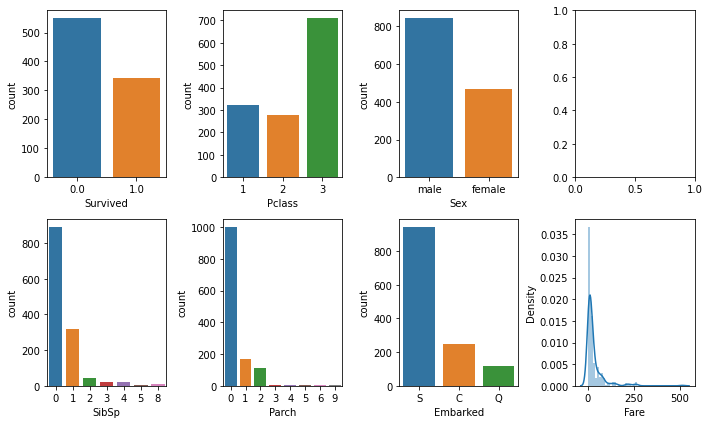

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(10,6))
sns.countplot('Survived',data=data,ax=ax[0][0])
sns.countplot('Pclass',data=data,ax=ax[0][1])
sns.countplot('Sex',data=data,ax=ax[0][2])
sns.countplot('SibSp',data=data,ax=ax[1][0])
sns.countplot('Parch',data=data,ax=ax[1][1])
sns.countplot('Embarked',data=data,ax=ax[1][2])
sns.distplot(data['Fare'],kde=True,ax=ax[1][3])

plt.tight_layout()

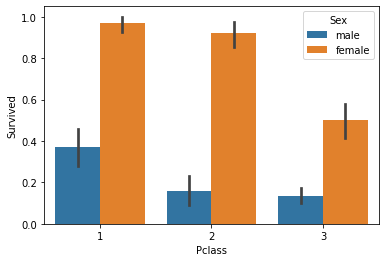

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue= 'Sex', data=data)
#티켓 클래스와 성별 + 생존자 데이터 시각화

In [ ]:
data.groupby(['Pclass','Survived'])['Survived'].count()
#Ratio of survival in different classes

Pclass  Survived
1       0.0          80
        1.0         136
2       0.0          97
        1.0          87
3       0.0         372
        1.0         119
Name: Survived, dtype: int64

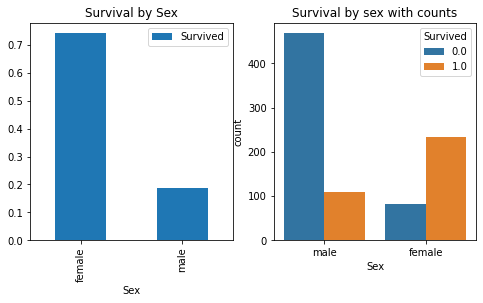

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(8, 4))
data[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival by Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Survival by sex with counts')
plt.show()
#성별에 따른 생존자 수 및 생존여부

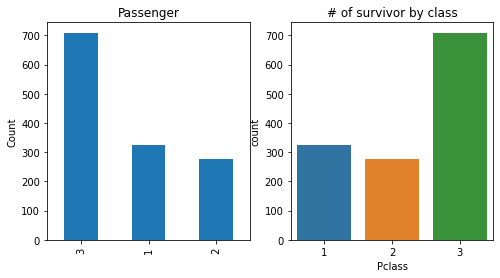

In [ ]:
f, ax = plt.subplots(1,2,figsize=(8,4))
data['Pclass'].value_counts().plot.bar(ax= ax[0])
ax[0].set_title("Passenger")
ax[0].set_ylabel("Count")
sns.countplot('Pclass',data=data, ax=ax[1])
ax[1].set_title("# of survivor by class")
plt.show()

#Class별 탑승객, Class별 생존한 탑승객 수

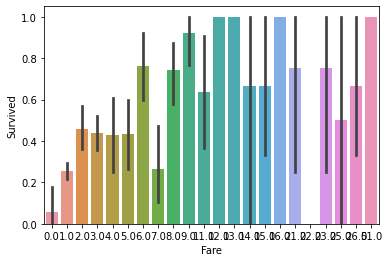

In [ ]:
def make_bins(d, col, factor=2):
    rounding = lambda x: np.around(x / factor)
    d[col] = d[col].apply(rounding)
    return d

t = make_bins(data, 'Fare', 10)
sns.barplot(x="Fare", y='Survived', data=data);
#bin을 만들어서 fare별 생존자 분류 > 비싼 가격에서의 생존률은 일정하지 않다. 낮은 가격일수록 확실히 낮은 생존률은 보인다.
 


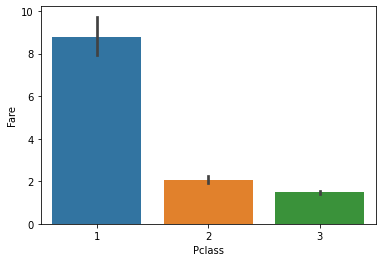

In [ ]:
sns.barplot(x='Pclass', y='Fare', data=t);
#Fare는 Pclass의 또다른 표현에 불과하기에 Fare는 이미 나누어진 3개의 Class로 대체 가능하여, Fare는 제외 가능하다

In [ ]:
#Age 
#가장 나이 많은 사람, 가장 나이 적은 사람, 나이 평균 print
print('The oldest passenger : {:.1f} Years'.format(data['Age'].max()))
print('The youngest passenger : {:.1f} Years'.format(data['Age'].min()))
print('Average age of passenger : {:.1f} Years'.format(data['Age'].mean()))

The oldest passenger : 80.0 Years
The youngest passenger : 0.2 Years
Average age of passenger : 29.9 Years


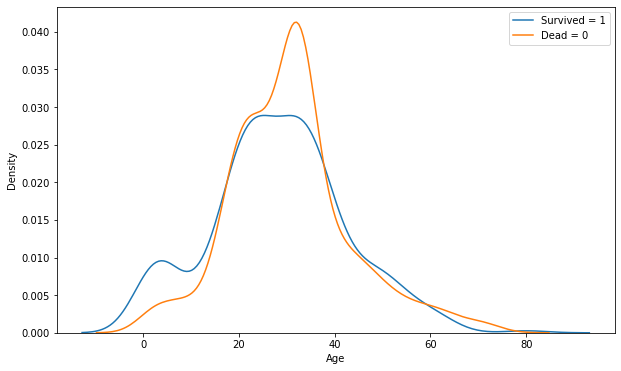

In [ ]:
#Histogram of Age according to Survival
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.kdeplot(data[data['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(data[data['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived = 1', 'Dead = 0'])
plt.show()

보다시피, 생존자 중 나이가 어린 경우가 많음을 볼 수 있다.

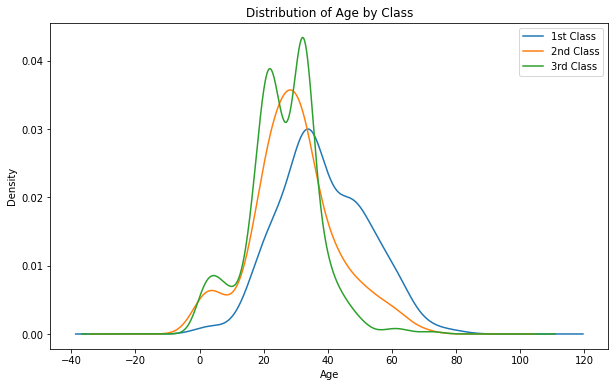

In [ ]:
# Age distribution withing classes
#클래스에 따른 나이 분포
plt.figure(figsize=(10, 6))
data['Age'][data['Pclass'] == 1].plot(kind='kde')
data['Age'][data['Pclass'] == 2].plot(kind='kde')
data['Age'][data['Pclass'] == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Distribution of Age by Class')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

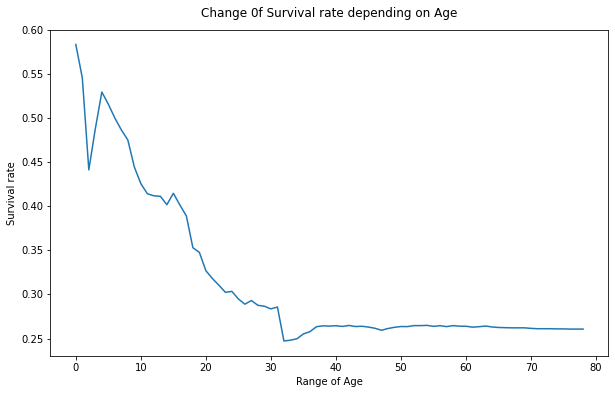

In [ ]:
survival_ratio = []
for i in range(1, 80):
    survival_ratio.append(data[data['Age'] < i]['Survived'].sum() / len(data[data['Age'] < i]['Survived']))
    
plt.figure(figsize=(10, 6))
plt.plot(survival_ratio)
plt.title('Change 0f Survival rate depending on Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age')
plt.show()

In [ ]:
#SibSp & Parch
#SibSp와 Parch를 합하면 Family가 됨. Family 로 합쳐서 분석
data['Family'] = data['SibSp'] + data['Parch'] + 1 # 자신을 포함해야하니 1을 더함
#df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더함

In [ ]:
#최대 최소 Family 수 print
print("Maximum size of Family: ", data['Family'].max())
print("Minimum size of Family: ", data['Family'].min())

Maximum size of Family:  11
Minimum size of Family:  1


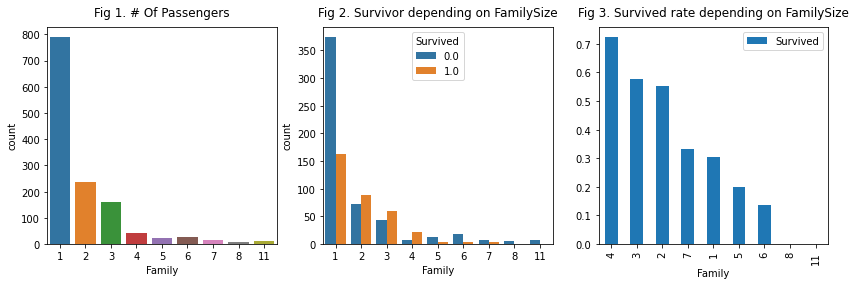

In [ ]:
#FamilySize 와 생존 관계를 한번 살펴보면
f,ax=plt.subplots(1, 3, figsize=(14,4))
sns.countplot('Family', data=data, ax=ax[0])
ax[0].set_title('Fig 1. # Of Passengers', y=1.02)

sns.countplot('Family', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Fig 2. Survivor depending on FamilySize',  y=1.02)

data[['Family', 'Survived']].groupby(['Family'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Fig 3. Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

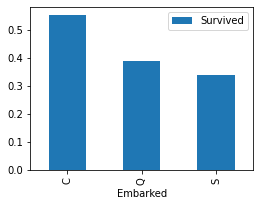

In [ ]:
#Embarked
f, ax = plt.subplots(1, 1, figsize=(4, 3))
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

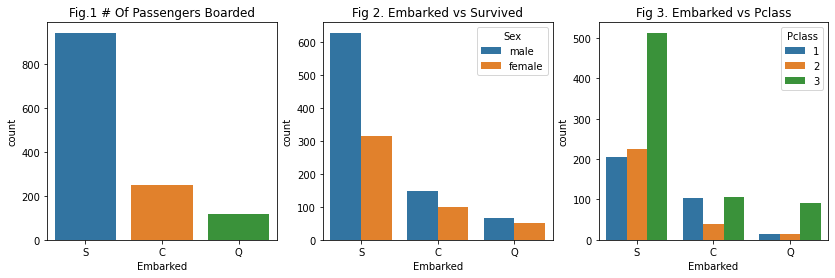

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(14,4))
sns.countplot('Embarked', data=data, ax=ax[0])
ax[0].set_title('Fig.1 # Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[1])
ax[1].set_title('Fig 2. Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[2])
ax[2].set_title('Fig 3. Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

##Feature Engineering

In [ ]:
#Converting String to Numerical Values
data['Sex'] = data['Sex'].astype(str)
data['Embarked'] = data['Embarked'].astype(str)
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Embarked'] = data['Embarked'].apply(pd.to_numeric)
data['Embarked'].astype(int)
data['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

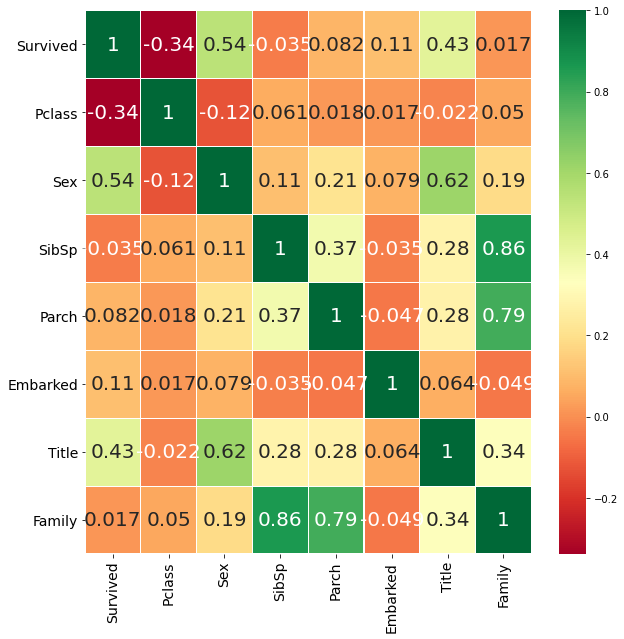

In [ ]:
df=data.copy()
df.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

From the Correlation plot we can see that SibSp and Parch are well correlated Family Size.
We can drop SibSp and Parch and keep only family size.

In [ ]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Embarked,Title,Family
0,0.0,3,0,0,0,2
1,1.0,1,1,1,1,2
2,1.0,3,1,0,2,1
3,1.0,1,1,0,1,2
4,0.0,3,0,0,0,1


In [ ]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Embarked      0
Title         0
Family        0
dtype: int64

##Modeling

In [ ]:
Train = df[:891]
Test = df[891:]

Train_lbl=Train.copy()
Train_lbl.drop(['Pclass','Sex','Embarked','Title', 'Family'],axis=1,inplace=True)
Train.drop(['Survived'],axis=1,inplace=True)
Test.drop(['Survived'],axis=1,inplace=True)
Test_lbl.drop(['PassengerId'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, Val, train_lbl, Val_lbl = train_test_split(Train, Train_lbl, test_size=0.1, random_state=42)

In [ ]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
SGD_model = SGDClassifier()
SGD_model.fit(train, train_lbl)

pred_SGD = SGD_model.predict(Val)
accuracy_score(Val_lbl,pred_SGD)

0.7444444444444445

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(train, train_lbl)

pred_NB = NB_model.predict(Val)
accuracy_score(Val_lbl,pred_NB)

0.8111111111111111

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier()
forest_model.fit(train, train_lbl)

pred_forest = forest_model.predict(Val)
accuracy_score(Val_lbl,pred_forest)

0.8333333333333334

In [ ]:
# Linear Support Vector Machine(Linear-SVM)
from sklearn.svm import LinearSVC
SVC_model = LinearSVC()
SVC_model.fit(train, train_lbl)

pred_SVC = SVC_model.predict(Val)
accuracy_score(Val_lbl,pred_SVC)

0.8

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
best_knn = []
for n in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train, train_lbl)
    best_knn.insert(n, knn.score(Val,Val_lbl))
best_knn

[0.8111111111111111,
 0.8444444444444444,
 0.8111111111111111,
 0.8333333333333334,
 0.8333333333333334,
 0.8555555555555555,
 0.8333333333333334,
 0.8555555555555555,
 0.8444444444444444]

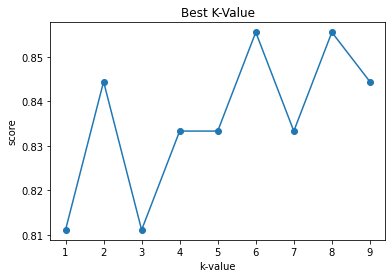

In [ ]:
plt.plot(range(1, 10), best_knn, marker='o')
plt.title('Best K-Value')
plt.xlabel('k-value')
plt.ylabel('score')
plt.show()

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=6)
KNN_model.fit(train, train_lbl)
print("Accuracy: ", KNN_model.score(Val,Val_lbl))

Accuracy:  0.8555555555555555


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['SGD','Naive Bayes','Random Forest','SVC','KNN']
models=[SGDClassifier(),
        GaussianNB(),
        RandomForestClassifier(),
        LinearSVC(),
        KNeighborsClassifier(n_neighbors=6)]

for i in models:
    model = i
    cv_result=cross_val_score(model,Train,Train_lbl, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
SGD,0.644032,0.164663
Naive Bayes,0.814806,0.038712
Random Forest,0.811498,0.042887
SVC,0.791261,0.036895
KNN,0.819376,0.043236


In [ ]:
pred1 = SGD_model.predict(Test)
accuracy_score(Test_lbl,pred1)

0.8516746411483254

In [ ]:
pred2 = NB_model.predict(Test)
accuracy_score(Test_lbl,pred2)

0.9401913875598086

In [ ]:
pred3 = forest_model.predict(Test)
accuracy_score(Test_lbl,pred3)

0.8588516746411483

In [ ]:
pred4 = SVC_model.predict(Test)
accuracy_score(Test_lbl,pred4)

0.9688995215311005

In [ ]:
pred5 = KNN_model.predict(Test)
accuracy_score(Test_lbl,pred5)

0.8253588516746412